In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from data_utils import *

from scipy import stats
import seaborn as sb
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf

'''
None || 20000 || 100000
'''
nb = None
nb_trains = nb
nb_valids = nb
nb_tests = nb

In [2]:
# from google.colab import drive
# drive.mount('/content/drive/')

In [3]:
# cd drive/MyDrive/Projects/JPX_Tokyo_Stock/working

#### Load Data

In [4]:
train_df = pd.read_csv('../__input__/1_DataPreprocessing/train_df.csv', parse_dates=['Date'], nrows = nb_trains)
valid_df = pd.read_csv('../__input__/1_DataPreprocessing/valid_df.csv', parse_dates=['Date'], nrows = nb_trains)
test_df = pd.read_csv('../__input__/1_DataPreprocessing/test_df.csv', parse_dates=['Date'], nrows = nb_trains)

snd_train_df = pd.read_csv('../__input__/1_DataPreprocessing/snd_train_df.csv', parse_dates=['Date'], nrows = nb_trains)
snd_valid_df = pd.read_csv('../__input__/1_DataPreprocessing/snd_valid_df.csv', parse_dates=['Date'], nrows = nb_trains)
snd_test_df = pd.read_csv('../__input__/1_DataPreprocessing/snd_test_df.csv', parse_dates=['Date'], nrows = nb_trains)

In [5]:
mini_train = pd.read_csv('../__input__/1_DataPreprocessing/mini_train.csv', parse_dates=['Date'], nrows = nb_trains)
mini_valid = pd.read_csv('../__input__/1_DataPreprocessing/mini_valid.csv', parse_dates=['Date'], nrows = nb_trains)

In [6]:
hidden_test = pd.read_csv('../__input__/jpx-tokyo-stock-exchange-prediction/example_test_files/stock_prices.csv', nrows = nb_tests, parse_dates=['Date'])

In [7]:
hidden_test = DataPreprocessing_for_HiddenTest(hidden_test, mini_valid)

In [8]:
train_df.info(null_counts= True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863182 entries, 0 to 1863181
Data columns (total 13 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   Date              1863182 non-null  datetime64[ns]
 1   SecuritiesCode    1863182 non-null  int64         
 2   ExpectedDividend  1863182 non-null  float64       
 3   AdjustmentFactor  1863182 non-null  float64       
 4   SupervisionFlag   1863182 non-null  bool          
 5   Volume            1863182 non-null  int64         
 6   Open              1863182 non-null  float64       
 7   High              1863182 non-null  float64       
 8   Low               1863182 non-null  float64       
 9   Close             1863182 non-null  float64       
 10  Target            1863182 non-null  float64       
 11  CloseT1           1863182 non-null  float64       
 12  CloseT2           1863182 non-null  float64       
dtypes: bool(1), datetime64[ns](1), float64(9),

In [9]:
valid_df.info(null_counts= True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232663 entries, 0 to 232662
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Date              232663 non-null  datetime64[ns]
 1   SecuritiesCode    232663 non-null  int64         
 2   ExpectedDividend  232663 non-null  float64       
 3   AdjustmentFactor  232663 non-null  float64       
 4   SupervisionFlag   232663 non-null  bool          
 5   Volume            232663 non-null  int64         
 6   Open              232663 non-null  float64       
 7   High              232663 non-null  float64       
 8   Low               232663 non-null  float64       
 9   Close             232663 non-null  float64       
 10  Target            232663 non-null  float64       
 11  CloseT1           232663 non-null  float64       
 12  CloseT2           232663 non-null  float64       
dtypes: bool(1), datetime64[ns](1), float64(9), int64(2)
memory 

In [10]:
test_df.info(null_counts= True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198663 entries, 0 to 198662
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Date              198663 non-null  datetime64[ns]
 1   SecuritiesCode    198663 non-null  int64         
 2   ExpectedDividend  198663 non-null  float64       
 3   AdjustmentFactor  198663 non-null  float64       
 4   SupervisionFlag   198663 non-null  bool          
 5   Volume            198663 non-null  int64         
 6   Open              198663 non-null  float64       
 7   High              198663 non-null  float64       
 8   Low               198663 non-null  float64       
 9   Close             198663 non-null  float64       
 10  Target            198663 non-null  float64       
 11  CloseT1           198663 non-null  float64       
 12  CloseT2           198663 non-null  float64       
dtypes: bool(1), datetime64[ns](1), float64(9), int64(2)
memory 

In [11]:
mini_train.info(null_counts= True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              6000 non-null   datetime64[ns]
 1   SecuritiesCode    6000 non-null   int64         
 2   ExpectedDividend  6000 non-null   float64       
 3   AdjustmentFactor  6000 non-null   float64       
 4   SupervisionFlag   6000 non-null   bool          
 5   Volume            6000 non-null   int64         
 6   Open              6000 non-null   float64       
 7   High              6000 non-null   float64       
 8   Low               6000 non-null   float64       
 9   Close             6000 non-null   float64       
 10  Target            6000 non-null   float64       
 11  CloseT1           6000 non-null   float64       
 12  CloseT2           6000 non-null   float64       
dtypes: bool(1), datetime64[ns](1), float64(9), int64(2)
memory usage: 568.5 KB


In [12]:
mini_valid.info(null_counts= True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              6000 non-null   datetime64[ns]
 1   SecuritiesCode    6000 non-null   int64         
 2   ExpectedDividend  6000 non-null   float64       
 3   AdjustmentFactor  6000 non-null   float64       
 4   SupervisionFlag   6000 non-null   bool          
 5   Volume            6000 non-null   int64         
 6   Open              6000 non-null   float64       
 7   High              6000 non-null   float64       
 8   Low               6000 non-null   float64       
 9   Close             6000 non-null   float64       
 10  Target            6000 non-null   float64       
 11  CloseT1           6000 non-null   float64       
 12  CloseT2           6000 non-null   float64       
dtypes: bool(1), datetime64[ns](1), float64(9), int64(2)
memory usage: 568.5 KB


In [13]:
hidden_test.info(null_counts= True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              4000 non-null   datetime64[ns]
 1   SecuritiesCode    4000 non-null   int64         
 2   Open              4000 non-null   float64       
 3   High              4000 non-null   float64       
 4   Low               4000 non-null   float64       
 5   Close             4000 non-null   float64       
 6   Volume            4000 non-null   int64         
 7   AdjustmentFactor  4000 non-null   float64       
 8   ExpectedDividend  4000 non-null   float64       
 9   SupervisionFlag   4000 non-null   bool          
dtypes: bool(1), datetime64[ns](1), float64(6), int64(2)
memory usage: 285.3 KB


#### EDA

Close

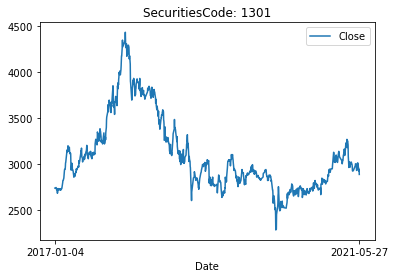

969


In [14]:
render_col(train_df, 1301, ['Close'])

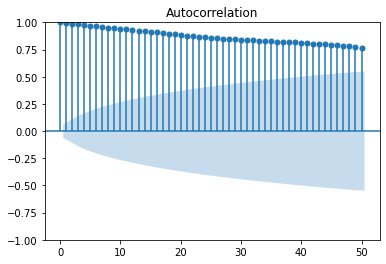

In [15]:
plot_acf(train_df['Close'][train_df['SecuritiesCode']== 1301].reset_index(drop = True), lags=50)
plt.show()

In [16]:
adfuller(train_df['Close'][train_df['SecuritiesCode']== 1301].reset_index(drop = True))


(-1.7619784621027368,
 0.3994949255681905,
 0,
 968,
 {'1%': -3.437123476942836,
  '5%': -2.8645304098119544,
  '10%': -2.568362253987091},
 9847.20091856388)

=> Close là 1 biến non-stationaru

Target

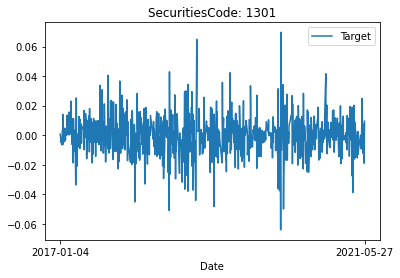

969


In [17]:
render_col(train_df, 1301, ['Target'])

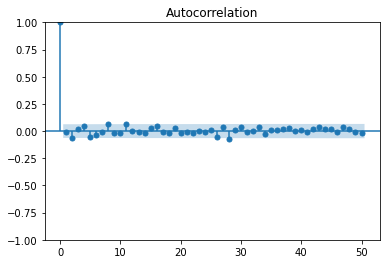

In [18]:
plot_acf(train_df['Target'][train_df['SecuritiesCode']== 1301].reset_index(drop = True), lags=50)
plt.show()

In [19]:
adfuller(train_df['Target'][train_df['SecuritiesCode']== 1301].reset_index(drop = True))


(-23.491337925884306,
 0.0,
 1,
 967,
 {'1%': -3.4371305002986277,
  '5%': -2.864533507042016,
  '10%': -2.5683639036818957},
 -5562.7608672037795)

=> Target là 1 biến stationary
    

Volume

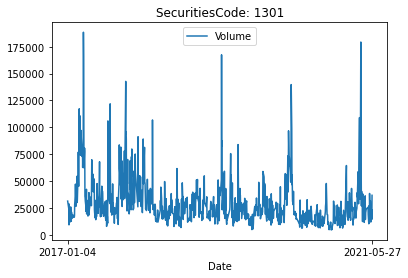

969


In [20]:
render_col(train_df, 1301, ['Volume'])

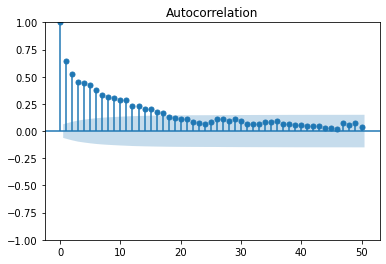

In [21]:
plot_acf(train_df['Volume'][train_df['SecuritiesCode']== 1301].reset_index(drop = True), lags=50)
plt.show()

In [22]:
adfuller(train_df['Volume'][train_df['SecuritiesCode']== 1301].reset_index(drop = True))

(-6.872862067035637,
 1.5001171109802873e-09,
 4,
 964,
 {'1%': -3.437151658028634,
  '5%': -2.8645428373470563,
  '10%': -2.5683688733406793},
 20989.976237610423)

In [23]:
def compare_gauss_dis(df_series: pd.Series, bins = 60):
    mu = df_series.mean()
    sigma = df_series.std()

    x = np.arange(df_series.min(), df_series.max(), (df_series.max() - df_series.min())/ 500)
    y = [1/np.sqrt(2*np.pi)/sigma*np.exp(-((i-mu)**2)/2/(sigma**2)) for i in x]
    gauss_df = pd.DataFrame({'x':x, 'y':y})

    ax = df_series.hist(bins= bins, density= True)
    gauss_df.plot(x='x', y='y', grid=True, ax=ax)
    plt.legend(['Gaussian fit'])
    plt.xlabel(df_series.name)
    plt.ylabel('Probability Density')
    plt.show()

    stats.probplot(df_series, dist="norm", plot=plt)
    plt.show()


In [24]:
new_vol = np.log(train_df['Volume'][train_df['SecuritiesCode']== 1301].reset_index(drop = True))

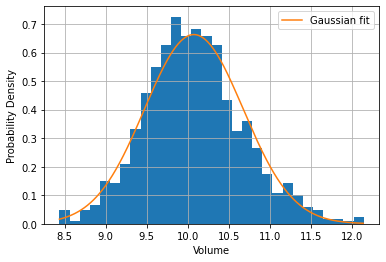

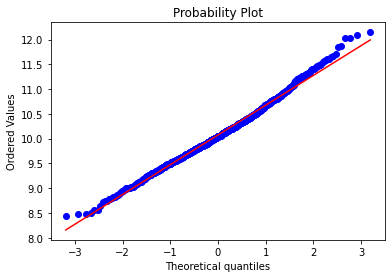

In [25]:
compare_gauss_dis(new_vol, bins = 30)

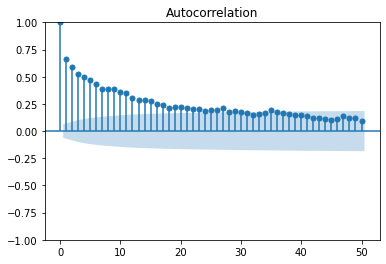

In [26]:
plot_acf(new_vol, lags=50)
plt.show()

In [27]:
adfuller(new_vol)

(-5.080040973232562,
 1.5374038445690864e-05,
 8,
 960,
 {'1%': -3.437180074590612,
  '5%': -2.8645553686071326,
  '10%': -2.5683755479600694},
 1097.355104389652)

=> log(Vol) là biến stationary tuân theo phân phối Gauss